In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('amazon.csv', encoding="iso-8859-1")

In [3]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [4]:
data = pd.read_csv('amazon.csv', encoding="iso-8859-1", parse_dates=['date'])

In [5]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [6]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [8]:
data.shape

(6454, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [10]:
data = data.drop_duplicates()

In [11]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
data.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [15]:
data['month_new']=data['month'].map({'janiero':'jan',
                                     'fevereiro':'feb',
                                     'marco':'march',
                                     'abril':'april',
                                     'maio':'May',
                                     'junho':'jun',
                                     'julho':'july',
                                     'agosto':'august',
                                     'setembro':'sep',
                                     'outubro':'oct',
                                     'novembro':'nov',
                                     'dezembro':'dec'
                                    })

In [17]:
data.tail()

,year,state,month,number,date,month_new
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,NaN
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,NaN
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,NaN
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,NaN
6453,2016,Tocantins,Dezembro,119.0,2016-01-01,NaN


In [18]:
data1 = data.groupby('month')['number'].sum().reset_index()

In [19]:
data1

,month,number
0,Abril,28184.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30839.050
4,Janeiro,47681.844
5,Julho,92319.113
6,Junho,55997.675
7,Maio,34725.363
8,Março,30709.405
9,Novembro,85508.054


<Axes: xlabel='month', ylabel='number'>

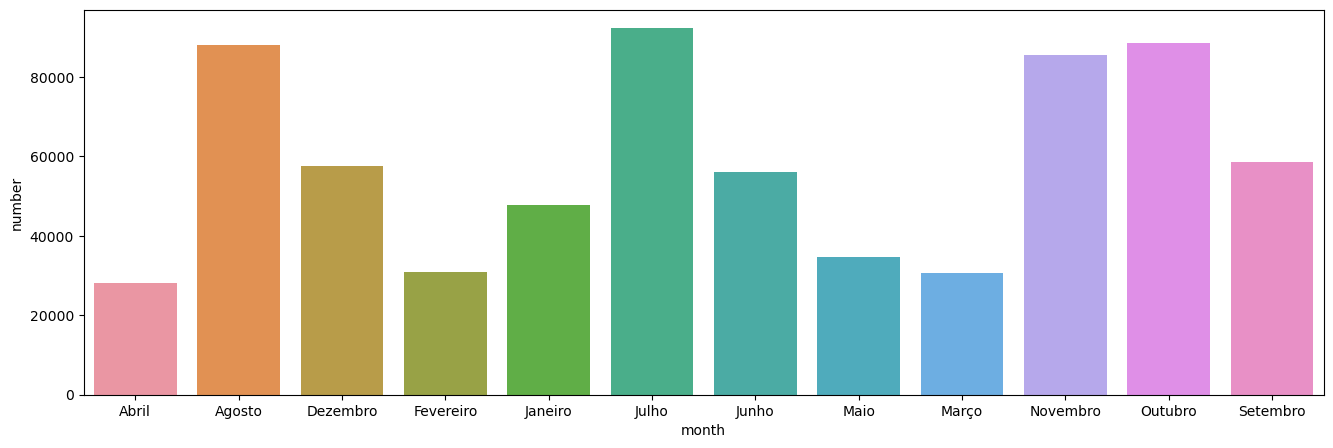

In [22]:
plt.figure(figsize=(16, 5))
sns.barplot(x="month", y="number", data=data1)

In [21]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

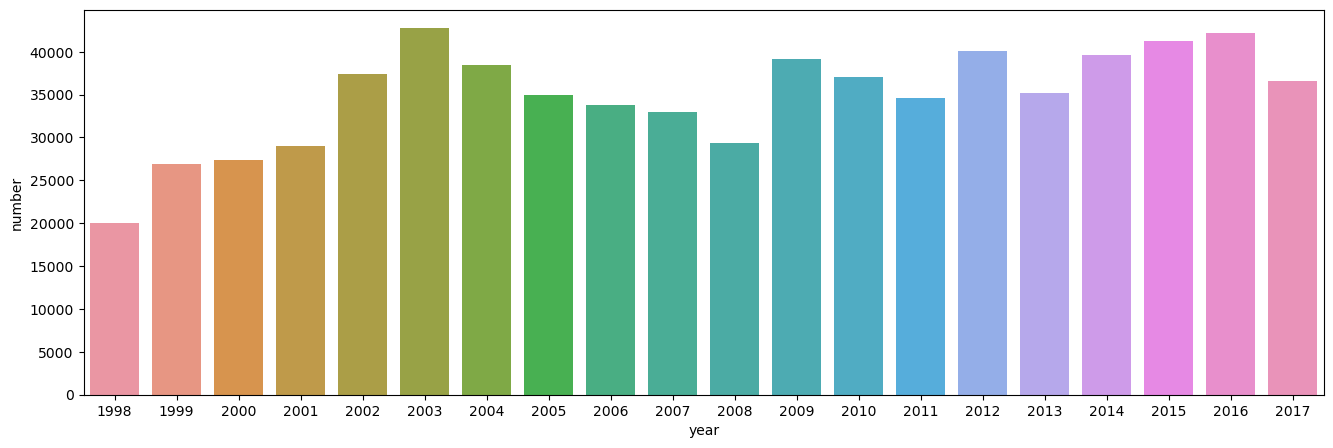

In [23]:
plt.figure(figsize=(16, 5))
sns.barplot(x="year", y="number", data=data2)

In [24]:
data3 = data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<Axes: xlabel='state', ylabel='number'>

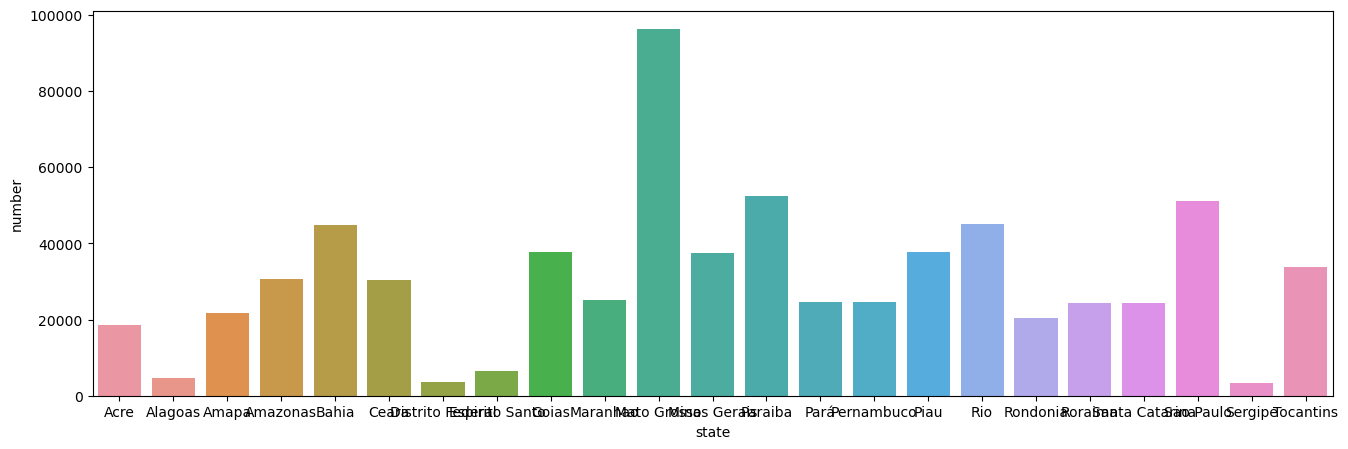

In [25]:
plt.figure(figsize=(16, 5))
sns.barplot(x="state", y="number", data=data3)

In [26]:
data[data['state']=="Amazonas"]['number']

718      0.0
719      3.0
720      7.0
721      3.0
722     17.0
       ...  
952     80.0
953    236.0
954    293.0
955    565.0
956    133.0
Name: number, Length: 239, dtype: float64

In [27]:
data[data['state']=="Amazonas"]['number'].sum()

30650.129

In [31]:
data4 = data[data['state']=="Amazonas"]
data5 = data4.groupby('year')['number'].sum()
data5

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

In [51]:
data6 = data[data['state']=="Amazonas"]
day = data6.groupby(data6['date'].dt.dayofweek).number

import calendar

day.index = [calendar.day_name[x] for x in range(0, 7)]
day

In [52]:
fire = data[data['year']==2015].groupby('month')['number'].sum().reset_index();

In [53]:
fire

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


<Axes: xlabel='month', ylabel='number'>

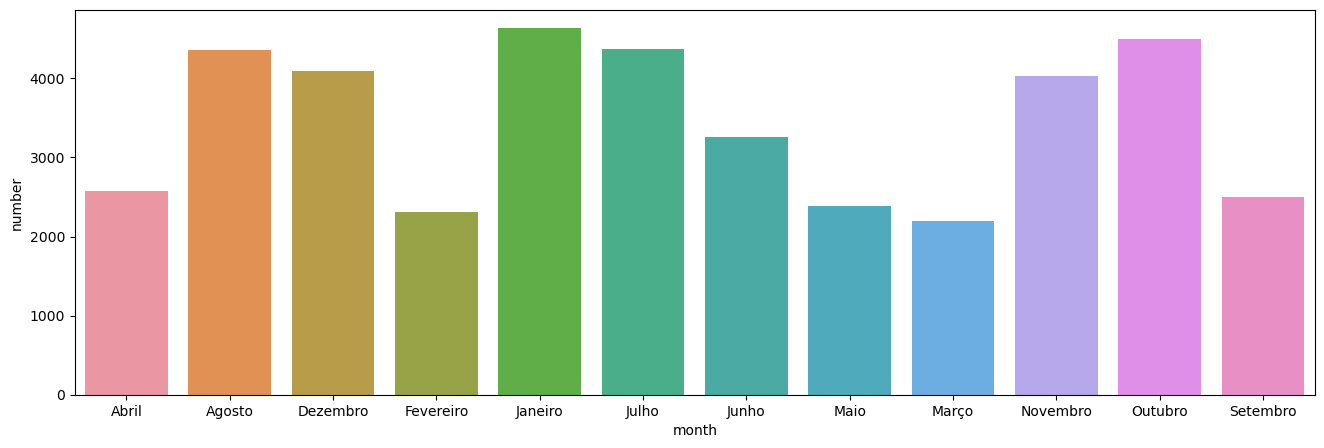

In [54]:
plt.figure(figsize=(16, 5))
sns.barplot(x="month", y="number", data=fire)

In [57]:
# Average number of fires reported from highest to lowest
data8 = data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

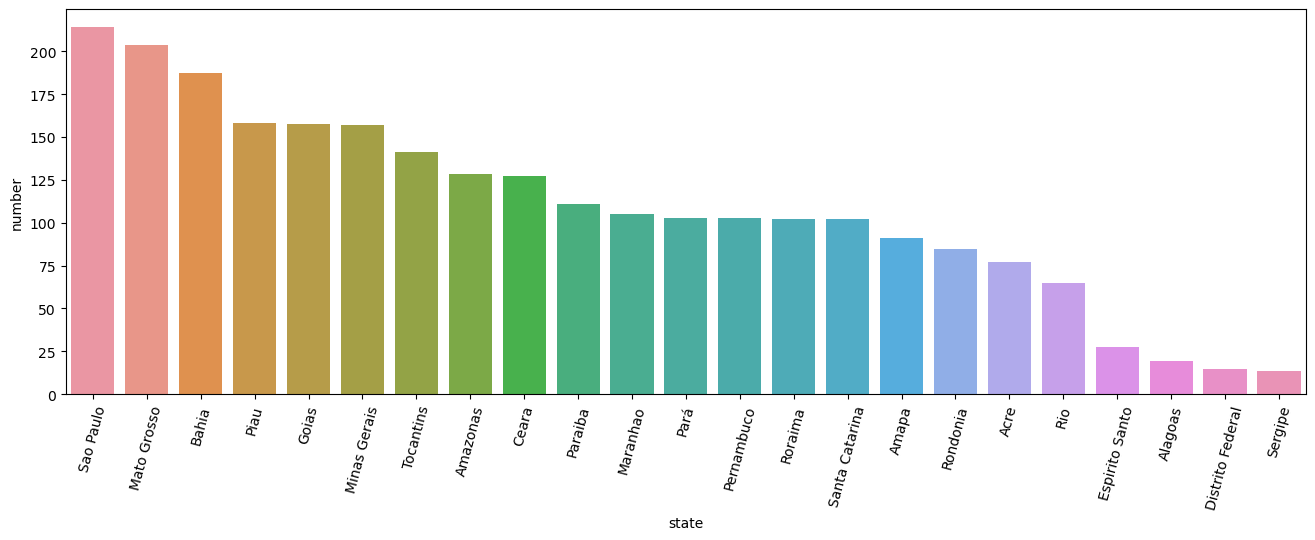

In [59]:
plt.figure(figsize=(16, 5))
sns.barplot(x="state", y="number", data=data8)
plt.xticks(rotation=75)
plt.show()